In [114]:
import pandas as pd
import numpy as np
import re
import pickle


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [115]:
df = pd.read_csv("C:/Users/remya/Downloads/job.csv")
df.head()


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [116]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15184 non-null  object
 8   benefits             10668 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [132]:
df['fraudulent'].value_counts()


fraudulent
0    17014
1      866
Name: count, dtype: int64

In [118]:
df['combined_text'] = df['title'].fillna('') + ' ' + \
                      df['location'].fillna('') + ' ' + \
                      df['department'].fillna('') + ' ' + \
                      df['salary_range'].fillna('') + ' ' + \
                      df['company_profile'].fillna('') + ' ' + \
                      df['description'].fillna('') + ' ' + \
                      df['requirements'].fillna('') + ' ' + \
                      df['benefits'].fillna('') + ' ' + \
                      df['required_education'].fillna('') + ' ' + \
                      df['required_experience'].fillna('')


In [119]:
df['text'] = df['title'].fillna('') + " " + df['description'].fillna('') + " " + df['requirements'].fillna('')
df = df[['text','fraudulent']]
df.head()


,text,fraudulent
0,"Marketing Intern Food52, a fast-growing, James...",0
1,Customer Service - Cloud Video Production Orga...,0
2,Commissioning Machinery Assistant (CMA) Our cl...,0
3,Account Executive - Washington DC THE COMPANY:...,0
4,Bill Review Manager JOB TITLE: Itemization Rev...,0


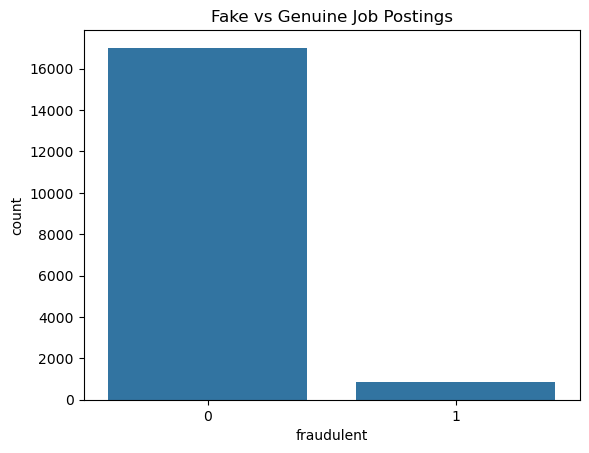

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['fraudulent'])
plt.title("Fake vs Genuine Job Postings")
plt.show()


In [121]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['text'])



y = df['fraudulent']
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [123]:
y_pred = model.predict(X_test)


In [124]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9650447427293065

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3396
           1       0.97      0.32      0.48       180

    accuracy                           0.97      3576
   macro avg       0.97      0.66      0.73      3576
weighted avg       0.97      0.97      0.96      3576


Confusion Matrix:
 [[3394    2]
 [ 123   57]]


In [125]:
pickle.dump(model, open("model.pkl", "wb"))
pickle.dump(vectorizer, open("vectorizer.pkl", "wb"))


In [126]:
def predict_job(title, location, department, salary, company, description, req, benefits, edu, exp):

    text = title + " " + location + " " + department + " " + salary + " " + company + " " + description + " " + req + " " + benefits + " " + edu + " " + exp
    
    vect = vectorizer.transform([text])
    
    pred = model.predict(vect)[0]
    prob = model.predict_proba(vect)[0][1]

    if pred == 1:
        print(" Fake Job Detected")
    else:
        print("Genuine Job")

    print("Fraud Risk:", prob*100, "%")


In [129]:
predict_job(
    "Data Entry Job",
    "Work From Home",
    "NA",
    "50000 weekly",
    "Unknown",
    "No experience needed",
    "Just typing",
    "None",
    "Not required",
    "0 years"
)


🚨 Fake Job Detected
Fraud Risk: 56.411142406752525 %


In [130]:
predict_job(
    "Online Data Entry Executive",
    "Remote / Work From Home",
    "Operations",
    "Earn up to 50000 INR per week",
    "Global Online Solutions Pvt Ltd",
    
    """We are urgently hiring candidates for online data entry work from home jobs.
    This is an excellent opportunity for students, housewives, and job seekers to earn fast income.
    No prior experience is required and flexible working hours are available.
    You can complete simple typing tasks from home using your mobile or laptop.""",
    
    """Candidates should have basic knowledge of typing.
    No interview process is required.
    Freshers are welcome to apply.
    Training will be provided after successful registration.
    Must be willing to start immediately.""",
    
    """Weekly payments.
    Instant joining.
    Flexible work schedule.
    High earning potential.
    Performance-based incentives.""",
    
    "No formal education required",
    "0 years experience"
)


🚨 Fake Job Detected
Fraud Risk: 60.43176949346108 %


In [131]:
predict_job(
    "Business Analyst",
    "Bangalore",
    "Analytics",
    "8 LPA - 12 LPA",
    "Infosys Limited",
    
    """We are seeking a Business Analyst to join our growing analytics team.
    The selected candidate will work closely with stakeholders to analyze business processes,
    gather requirements, and provide data-driven insights to support strategic decisions.
    The role involves preparing reports, identifying improvement areas,
    and collaborating with technical teams for solution implementation.""",
    
    """Bachelor’s or Master’s degree in Business, IT, or related field.
    Strong analytical and problem-solving skills.
    Experience in data analysis and reporting tools.
    Good communication and documentation skills.
    Prior experience in business analysis is preferred.""",
    
    """Health insurance.
    Provident fund.
    Paid leave.
    Career development programs.
    Hybrid work flexibility.""",
    
    "Bachelor's Degree",
    "2+ years experience"
)


✅ Genuine Job
Fraud Risk: 1.5064551059112352 %


In [133]:
predict_job(
    "Software Engineer",
    "New York, NY",
    "Engineering",
    "90000-120000",
    "Tech Solutions Inc.",
    
    """Tech Solutions Inc. is looking for a skilled Software Engineer to join our backend development team.
    The candidate will design, develop, and maintain scalable web applications.
    You will collaborate with cross-functional teams to define, design, and ship new features.
    The role involves debugging production issues and optimizing system performance.""",
    
    """Bachelor’s degree in Computer Science or related field.
    3+ years of experience in Python or Java.
    Strong understanding of REST APIs and databases.
    Experience with Git and Agile methodologies.""",
    
    """Health insurance, paid time off, retirement plan, performance bonus.""",
    
    "Bachelor's Degree",
    "3+ years experience"
)


✅ Genuine Job
Fraud Risk: 1.6608857601081322 %
